In [2]:
import numpy as np

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, LR=0.01, n_iter=1000):
        self.LR = LR
        self.n_iter = n_iter
        self.weight = None
        self.bias = None

    def activation_function(self, threshold):
        return np.where(threshold > 0, 1, -1)

    def fit(self, X, y):
        self.weight = np.zeros(X.shape[1])
        self.bias = 0
        y_ = np.array([1 if i > 0 else -1 for i in y])
        for _ in range(self.n_iter):  
            for idx, x_i in enumerate(X):
                threshold = np.dot(x_i, self.weight) + self.bias
                activation_function_bool = self.activation_function(threshold)
                update = (y_[idx] - activation_function_bool) * self.LR
                self.weight += update * x_i
                self.bias += update
                
    def predict(self, X_train):
        threshold_train = np.dot(X_train, self.weight) + self.bias
        y_predict = self.activation_function(threshold_train)
        return y_predict


Accuracy: 1.0000


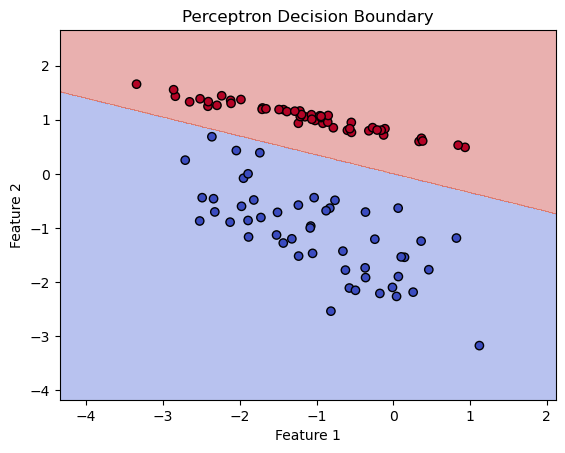

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# データセットの生成
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=100)
# ラベルを-1と1に変換
y[y == 0] = -1

# パーセプトロンモデルのインスタンスを作成
model = Perceptron(LR=0.01, n_iter=1000)

# モデルの学習
model.fit(X, y)

# モデルの予測
y_pred = model.predict(X)

# 精度の計算
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 決定境界のプロット
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', cmap=plt.cm.coolwarm)
plt.plot(xx, -(model.weight[0]*xx + model.bias) / model.weight[1], "g-", linewidth=2) # 決定境界線

plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()